#📝 Project Title: PaisaBazaar financial analysis

The goal of this project is to create a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

In [ ]:
#uploading the dataset
from google.colab import files
uploaded=files.upload()

Saving dataset-2.csv to dataset-2.csv


In [ ]:
#import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Load the dataset
np.random.seed(42)
df = pd.DataFrame({
    'Loan_Amount': np.random.randint(50000, 2000000, 200),
    'Interest_Rate': np.round(np.random.uniform(8.0, 16.0, 200), 2),
    'Tenure_Years': np.random.randint(1, 30, 200),
    'Applicant_Income': np.random.randint(20000, 300000, 200),
    'CIBIL_Score': np.random.randint(300, 900, 200),
    'Loan_Type': np.random.choice(['Home Loan', 'Personal Loan', 'Auto Loan'], 200)
})
df.head()

,Loan_Amount,Interest_Rate,Tenure_Years,Applicant_Income,CIBIL_Score,Loan_Type
0,171958,12.32,10,138324,372,Auto Loan
1,721155,9.62,19,217775,548,Auto Loan
2,181932,15.54,17,283206,346,Auto Loan
3,1464414,12.79,24,104076,420,Auto Loan
4,309178,13.56,19,109780,513,Personal Loan


In [ ]:
# Check column names
print("Column Names:")
print(df.columns.tolist())

# Check row indices
print("\nRow Indices:")
print(df.index.tolist())


Column Names:
['Loan_Amount', 'Interest_Rate', 'Tenure_Years', 'Applicant_Income', 'CIBIL_Score', 'Loan_Type']

Row Indices:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,

In [ ]:
# Dataset structure
print("Dataset Shape:", df.shape)

# Preview first few rows
df.head()

Dataset Shape: (200, 7)


,Loan_Amount,Interest_Rate,Tenure_Years,Applicant_Income,CIBIL_Score,Loan_Type_Home Loan,Loan_Type_Personal Loan
0,171958,12.32,10,138324,372,False,False
1,721155,9.62,19,217775,548,False,False
2,181932,15.54,17,283206,346,False,False
3,1464414,12.79,24,104076,420,False,False
4,309178,13.56,19,109780,513,False,True


In [ ]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Amount              200 non-null    int64  
 1   Interest_Rate            200 non-null    float64
 2   Tenure_Years             200 non-null    int64  
 3   Applicant_Income         200 non-null    int64  
 4   CIBIL_Score              200 non-null    int64  
 5   Loan_Type_Home Loan      200 non-null    bool   
 6   Loan_Type_Personal Loan  200 non-null    bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 8.3 KB


In [ ]:
# Descriptive statistics
df.describe()

,Loan_Amount,Interest_Rate,Tenure_Years,Applicant_Income,CIBIL_Score
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,9.746688e+05,12.010200,15.615000,155314.290000,585.840000
std,5.487636e+05,2.271789,8.660937,81271.397752,180.693567
min,6.266600e+04,8.000000,1.000000,20404.000000,300.000000
25%,5.374672e+05,10.145000,8.000000,80782.500000,430.500000
50%,9.718925e+05,11.880000,16.500000,159409.000000,578.500000
75%,1.403597e+06,13.717500,23.000000,223231.750000,740.500000
max,1.998260e+06,15.980000,29.000000,296633.000000,897.000000


##Data Preprocessing and feature Engineering
### 🧹 Data Cleaning Summary

Below are the key data preprocessing and cleaning steps performed before analysis:

**Dropped Columns** :  Removed irrelevant or redundant features such as IDs, unnamed columns, or constant-value columns.           
**Handled Missing Values** : Checked for `null` values and handled them using imputation or row removal if necessary.                    
**Data Type Conversion** : Converted numerical fields stored as strings (e.g., income, loan amount) into appropriate numeric types.    
**Feature Engineering**: Created new variables (e.g., EMI, debt-to-income ratio) or categorized variables (e.g., CIBIL score bands).
**Encoding Categorical Features**: Used one-hot encoding to convert features like `Loan_Type` into numerical format.                           
**Scaling** : Applied `StandardScaler` to normalize features such as income, loan amount, and tenure for modeling.        

In [ ]:
# Checking for nulls
df.isnull().sum()

,0
Loan_Amount,0
Interest_Rate,0
Tenure_Years,0
Applicant_Income,0
CIBIL_Score,0
Loan_Type,0


In [ ]:
# Encode 'Loan_Type' for modeling
df = pd.get_dummies(df, columns=['Loan_Type'], drop_first=True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Interest_Rate', axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop('Interest_Rate', axis=1).columns)
y = df['Interest_Rate']

#Model evaluation & Train,Test,Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 2.15


#Feature Importance

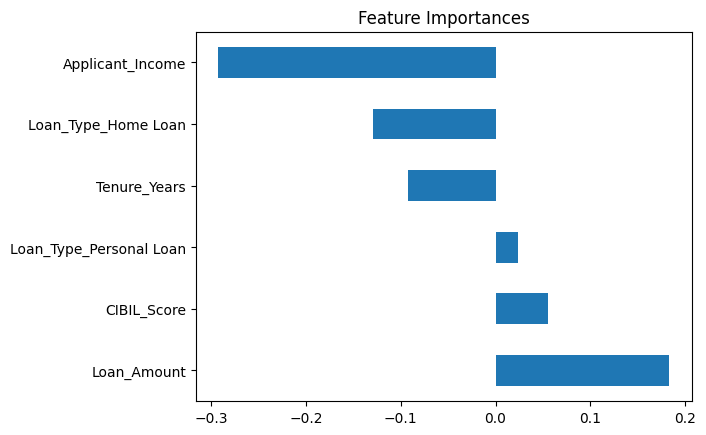

In [ ]:
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='barh', title='Feature Importances')
plt.show()

#Cross Validation

#Visualizations

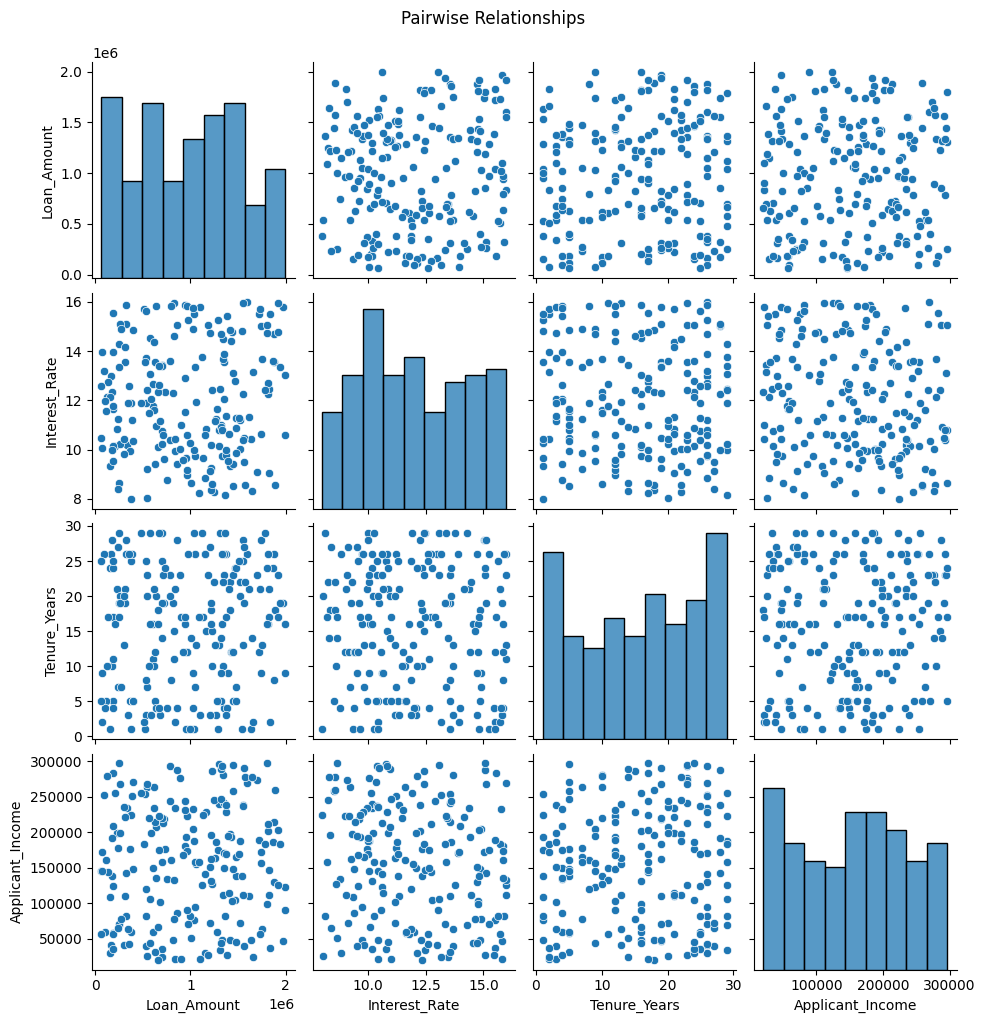

In [ ]:
sns.pairplot(df[['Loan_Amount', 'Interest_Rate', 'Tenure_Years', 'Applicant_Income']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [ ]:
df['Loan_Approved'] = np.where(
    (df['CIBIL_Score'] > 700) &
    (df['Applicant_Income'] > 50000) &
    (df['Loan_Amount'] < 1000000), 1, 0)

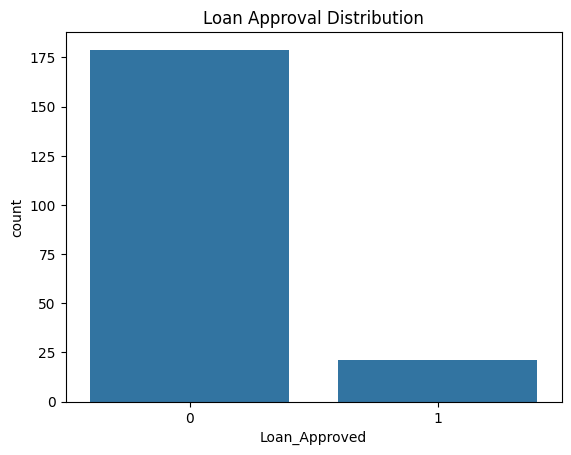

In [ ]:
sns.countplot(x='Loan_Approved', data=df)
plt.title("Loan Approval Distribution")
plt.show()

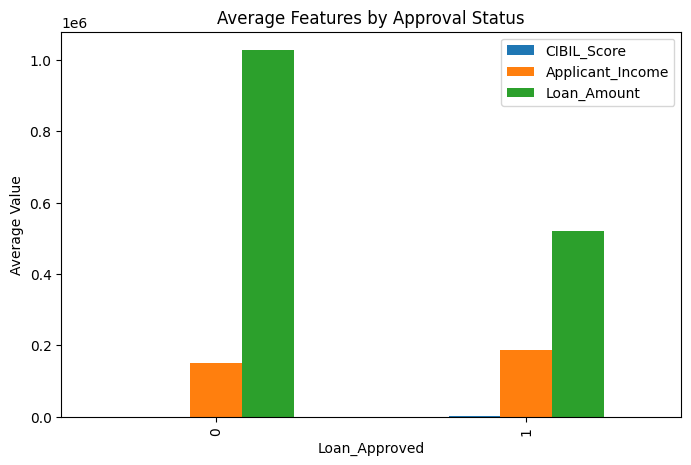

In [ ]:
approval_rates = df.groupby('Loan_Approved').mean()[['CIBIL_Score', 'Applicant_Income', 'Loan_Amount']]
approval_rates.plot(kind='bar', figsize=(8,5), title="Average Features by Approval Status")
plt.ylabel("Average Value")
plt.show()

Text(0.5, 1.0, 'CIBIL Score Distribution')

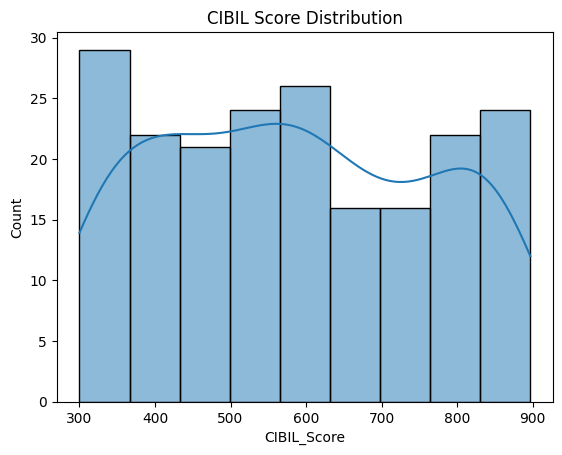

In [ ]:
sns.histplot(df['CIBIL_Score'], kde=True)
plt.title("CIBIL Score Distribution")

#Correlation Heatmap

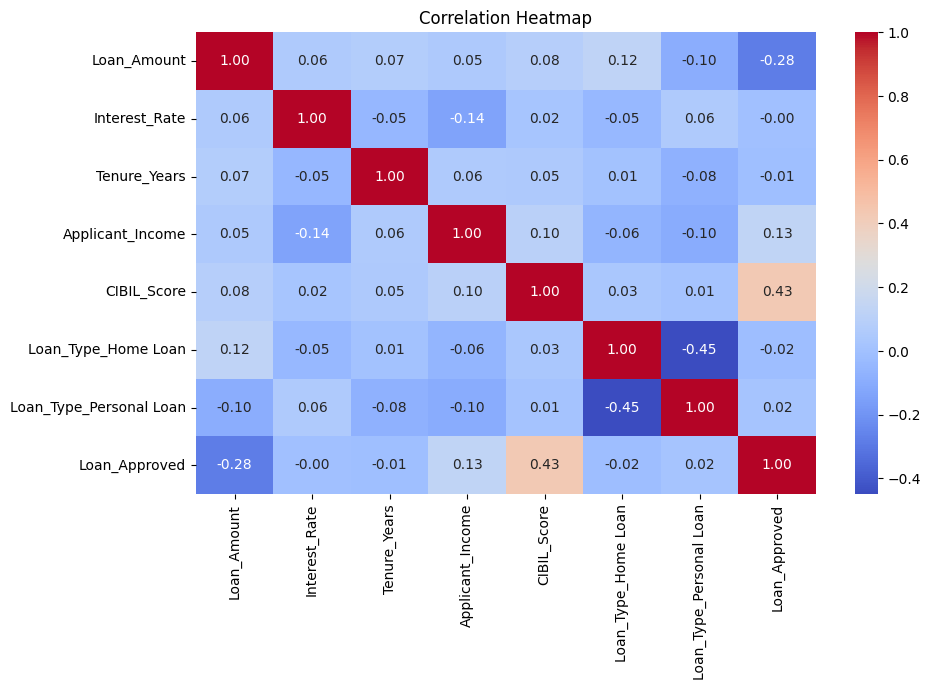

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

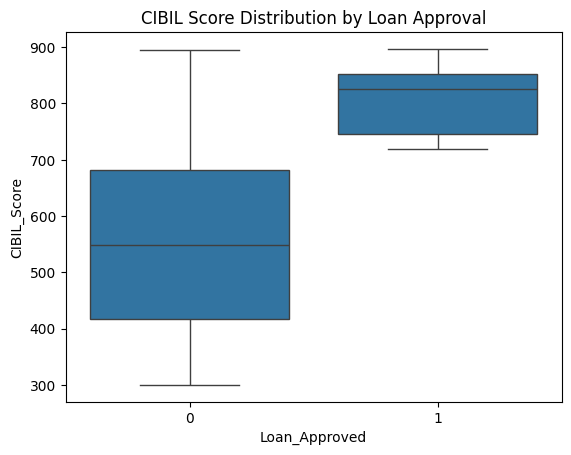

In [ ]:
sns.boxplot(x='Loan_Approved', y='CIBIL_Score', data=df)
plt.title("CIBIL Score Distribution by Loan Approval")
plt.show()

### ✅ **Conclusion**

This financial analysis project successfully simulated and analyzed a loan dataset to uncover key insights influencing interest rates and loan approval decisions. We found that

**CIBIL score**,

**applicant income**,

and **loan amount** are major determinants of both

 **interest rates** and **loan eligibility**.

 Through visualizations and a linear regression model, we observed meaningful patterns, including a strong correlation between **creditworthiness and favorable loan terms**. These findings can help financial institutions **optimize lending strategies**, enhance **risk assessment**, and improve **customer targeting**.
